## Coding Practice #0501

### 1. Keras Sequential API model:

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
warnings.filterwarnings('ignore')                              # Turn the warnings off.
%matplotlib inline

In [2]:
import tensorflow as tf
print(tf.__version__)

1.15.0


#### 1.1. Read in the data and explore:

In [4]:
from google.colab import files

uploaded = files.upload()

Saving data_boston.csv to data_boston (3).csv


In [5]:
for fn in uploaded.keys():
  print(fn, len(uploaded[fn]))

data_boston.csv 35202


In [0]:
# Read.
import io

df = pd.read_csv(io.StringIO(uploaded['data_boston.csv'].decode('utf-8')), header='infer', encoding = 'latin1')
X = df.drop(columns=['PRICE'])
y = df['PRICE']

In [7]:
# View.
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
# Scale the X data.
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [0]:
# Spit the data into training and testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]

#### 1.2. Define a Sequential API model:

In [10]:
# Add layers on a Sequential object.
my_model1 = Sequential()
my_model1.add(Dense(input_dim = n_vars, units = 1, activation="linear"))    # Add a output layer for linear regression.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
# Summary of the model.
my_model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


#### 1.3. Define the hyperparameters and optimizer:

In [0]:
# Hyperparameters.
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

In [0]:
# Define the optimizer and then compile.
my_optimizer=Adam(lr=learn_rate)
my_model1.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])

#### 1.4. Train the model and visualize the history:

In [0]:
# Train the model.
# verbose = 0 means no output. verbose = 1 to view the epochs.
my_summary = my_model1.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

In [15]:
# View the keys.
my_summary.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

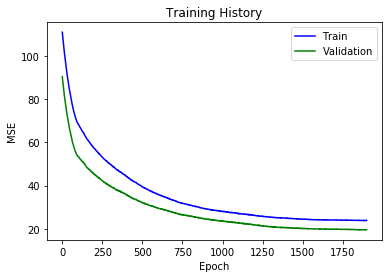

In [16]:
# Visualize the training history. 
n_skip = 100                 # Skip the first few steps.
plt.plot(my_summary.history['mean_squared_error'][n_skip:], c="b")
plt.plot(my_summary.history['val_mean_squared_error'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#### 1.5. Testing: 

In [17]:
# Predict and test using a formula.
y_pred = my_model1.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test-y_pred)**2))
np.round(RMSE,3)

5.639

In [18]:
# Use the evaluate() method.
MSE = my_model1.evaluate(X_test, y_test, verbose=0)[1]        # Returns the 0 = loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 5.638999938964844


### 2. Keras Functional API model:

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

#### 2.1. Define a Functional API model:

In [0]:
my_input = Input(shape=(n_vars,))                                     # Input layer.
my_output = Dense(units=1,activation='linear')(my_input)              # Output layer.

In [0]:
my_model2 = Model(inputs=my_input,outputs=my_output)                   # The model.

In [22]:
# Summary of the model.
my_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Define the optimizer and then compile.
my_optimizer=Adam(lr=learn_rate)
my_model2.compile(loss = "mae", optimizer = my_optimizer, metrics=["mse"])    # Loss = MAE (L1) and Metrics = MSE (L2). 

#### 2.2. Train the model and visualize the history:

In [0]:
# Train the model.
my_summary = my_model2.fit(X_train, y_train, epochs=n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

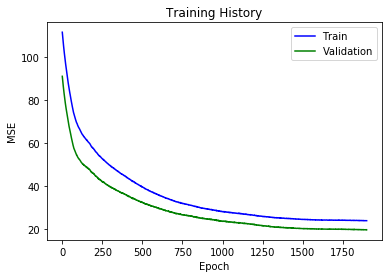

In [25]:
# Visualize the training history.
n_skip = 100                 # Skip the first few steps.
plt.plot(my_summary.history['mean_squared_error'][n_skip:], c="b")
plt.plot(my_summary.history['val_mean_squared_error'][n_skip:], c="g")
plt.title('Training History')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [26]:
# Use the evaluate() method.
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]        # Returns the 0 = loss value and 1 = metrics value.
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(np.round(RMSE,3)))

Test RMSE : 5.632999897003174
